### Student: Angela Shane
#### Homework 05: Pyber

### Observations:
1. The number of drivers and number of riders are directly proportional.
2. Rural areas have a larger variance in average fare.
3. Urban areas have a larger variance in total number of rides.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
ride_file="./raw_data/ride_data.csv"
city_file="./raw_data/city_data.csv"

In [79]:
ride_df = pd.read_csv(ride_file)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [80]:
city_df = pd.read_csv(city_file)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [81]:
ride_sum = pd.DataFrame({
    "tot_fare": ride_df.groupby("city")["fare"].sum(),
    "avg_fare":  ride_df.groupby("city")["fare"].mean(), 
    "ride_count": ride_df.groupby("city")["ride_id"].count()})
ride_sum.reset_index(inplace=True)
ride_sum.head()
#len(ride_sum)

,city,avg_fare,ride_count,tot_fare
0,Alvarezhaven,23.928710,31,741.79
1,Alyssaberg,20.609615,26,535.85
2,Anitamouth,37.315556,9,335.84
3,Antoniomouth,23.625000,22,519.75
4,Aprilchester,21.981579,19,417.65


### Data Cleanup
The city_data.csv has a duplicate city, Port James.
To clean the data, the city_data was grouped by city.  
Other columsn were aggregated as follows: t
* the driver_count is summed 
* the type is the minimum value.

In [82]:
city_sum = city_df.groupby(["city"],as_index=False).agg({"driver_count":"sum","type":"min"})
city_sum.head()
#len(city_sum)

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [83]:
pyber_df = pd.merge(ride_sum, city_sum, how="outer",on="city")
pyber_df.head()
#len(pyber_df)

,city,avg_fare,ride_count,tot_fare,driver_count,type
0,Alvarezhaven,23.928710,31,741.79,21,Urban
1,Alyssaberg,20.609615,26,535.85,67,Urban
2,Anitamouth,37.315556,9,335.84,16,Suburban
3,Antoniomouth,23.625000,22,519.75,21,Urban
4,Aprilchester,21.981579,19,417.65,49,Urban


In [84]:
series = pyber_df["type"].unique()
series

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [85]:
urban_df = pyber_df[pyber_df["type"]=="Urban"]
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]
rural_df = pyber_df[pyber_df["type"]=="Rural"]

In [86]:
def plot_series(df,color):
   return plt.scatter(df["ride_count"], df["avg_fare"], c=color,s=df["driver_count"]*10, linewidths=2,edgecolor='w',alpha=0.5)

urban_series = plot_series(urban_df,'lightcoral')
suburban_series = plot_series(suburban_df,'lightskyblue')
rural_series = plot_series(rural_df,'gold')

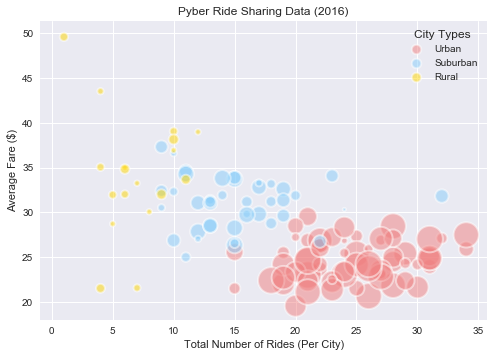

In [87]:
legend = plt.legend((urban_series, suburban_series, rural_series),
            series, fontsize="small", mode="Expanded", labelspacing=0.5,
            numpoints=1, scatterpoints=1, loc="best", title="City Types")
legend.legendHandles[0]._sizes = [90]
legend.legendHandles[1]._sizes = [90]
legend.legendHandles[2]._sizes = [90]

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
sns.set()
plt.savefig('pyber_2016_bubble_chart.png')
plt.show()

In [88]:
def pie_chart(pie_labels, pie_values, chart_title, png_name):
    colors = ["gold", "lightskyblue", "lightcoral"]
    explode = (0,0,0.05)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(chart_title)
    ax.pie(pie_values, explode=explode,labels=pie_labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90)
    ax.axis("equal")
    plt.savefig(png_name)
    plt.show()

In [89]:
#% of Total Fares by City Type
fares_city_type = pd.DataFrame(pyber_df.groupby("type")["tot_fare"].sum())
fares_city_type.reset_index(inplace=True)
total_fares_city_type = fares_city_type["tot_fare"].sum()
fares_city_type["pct"] = (fares_city_type["tot_fare"] / total_fares_city_type) * 100
fares_city_type.head()

,type,tot_fare,pct
0,Rural,4255.09,6.68500
1,Suburban,19317.88,30.34954
2,Urban,40078.34,62.96546


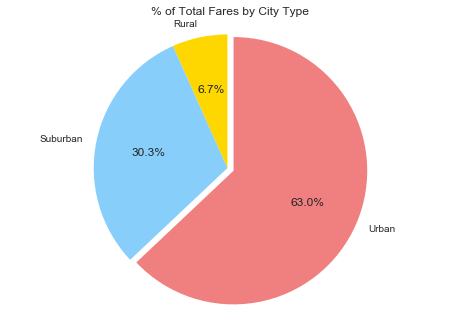

In [90]:
pie_labels = fares_city_type["type"]
pie_values = fares_city_type["pct"]
pie_chart(pie_labels, pie_values,"% of Total Fares by City Type",'pyber_fares.png')

In [91]:
#% of Total Rides by City Type
riders_city_type = pd.DataFrame(pyber_df.groupby("type")["ride_count"].sum())
riders_city_type.reset_index(inplace=True)
total_riders_city_type = riders_city_type["ride_count"].sum()
riders_city_type["pct"] = (riders_city_type["ride_count"] / total_riders_city_type) * 100
riders_city_type.head()

,type,ride_count,pct
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


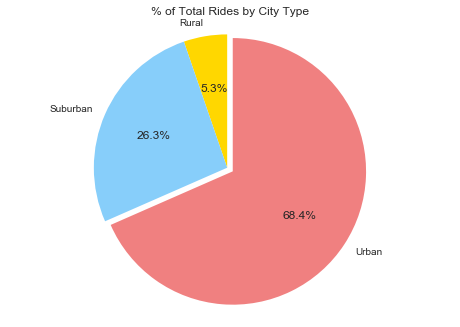

In [92]:
pie_labels = riders_city_type["type"]
pie_values = riders_city_type["pct"]
pie_chart(pie_labels, pie_values,"% of Total Rides by City Type",'pyber_rides.png')

In [93]:
#% of Total Drivers by City Type
dr_city_type = pd.DataFrame(pyber_df.groupby("type")["driver_count"].sum())
dr_city_type.reset_index(inplace=True)
total_dr_city_type = dr_city_type["driver_count"].sum()
dr_city_type["pct"] = (dr_city_type["driver_count"]/ total_dr_city_type) * 100
dr_city_type.head()

,type,driver_count,pct
0,Rural,104,3.105405
1,Suburban,638,19.050463
2,Urban,2607,77.844133


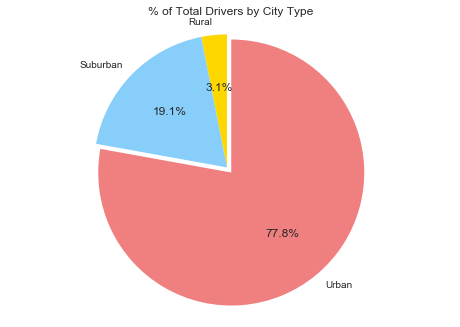

In [94]:
pie_labels = dr_city_type["type"]
pie_values = dr_city_type["pct"]
pie_chart(pie_labels, pie_values,"% of Total Drivers by City Type",'pyber_drivers.png')